In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Data 2022df_2022.columns
df_2022=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Age at First Marriage /Processed data of 2022 after delete null values and make groups in dataset.xlsx")
df=df_2022

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16038 entries, 0 to 16037
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Types_of_place_of_residence    16038 non-null  int64
 1   Division                       16038 non-null  int64
 2   Highest_educational_level      16038 non-null  int64
 3   Religion                       16038 non-null  int64
 4   Literacy                       16038 non-null  int64
 5   Weath_index_combined           16038 non-null  int64
 6   Husband_desire_for_children    16038 non-null  int64
 7   Exposure                       16038 non-null  int64
 8   Husband_education_level        16038 non-null  int64
 9   Respondent_currently_working   16038 non-null  int64
 10  Respondent_current_age         16038 non-null  int64
 11  Husband_age                    16038 non-null  int64
 12  Respondent age at first birth  16038 non-null  int64
 13  num of child    

In [ ]:
df['Respondent age at first birth'].value_counts()

,count
Respondent age at first birth,
0,11866
1,4019
2,153


In [ ]:
X=df_2022.drop('Age_at_first_marriage',axis=1)
Y=df_2022['Age_at_first_marriage']

# Lasso

In [ ]:
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=10,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X,Y)
print("Best Params {}".format(lasso_cv.best_params_))


Best Params {'alpha': np.float64(1e-05)}


In [ ]:
names=df_2022.drop("Age_at_first_marriage", axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['Types_of_place_of_residence' 'Division' 'Highest_educational_level'
 'Religion' 'Literacy' 'Weath_index_combined'
 'Husband_desire_for_children' 'Exposure' 'Husband_education_level'
 'Respondent_currently_working' 'Respondent_current_age' 'Husband_age'
 'Respondent age at first birth' 'num of child' 'Occupation_of_husband'
 'Current_contrceptive_method']


In [ ]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16038 entries, 0 to 16037
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Types_of_place_of_residence    16038 non-null  int64
 1   Division                       16038 non-null  int64
 2   Highest_educational_level      16038 non-null  int64
 3   Religion                       16038 non-null  int64
 4   Literacy                       16038 non-null  int64
 5   Weath_index_combined           16038 non-null  int64
 6   Husband_desire_for_children    16038 non-null  int64
 7   Exposure                       16038 non-null  int64
 8   Husband_education_level        16038 non-null  int64
 9   Respondent_currently_working   16038 non-null  int64
 10  Respondent_current_age         16038 non-null  int64
 11  Husband_age                    16038 non-null  int64
 12  Respondent age at first birth  16038 non-null  int64
 13  num of child    

In [ ]:
# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params , cv=kf)
lasso_cv.fit(X,Y)
print("Best Params {}".format(lasso_cv.best_params_))


Best Params {'alpha': np.float64(1e-05)}


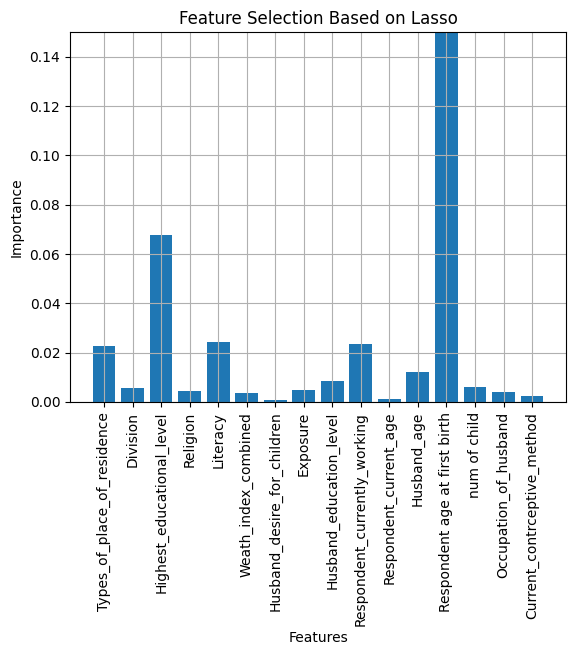

In [ ]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X, Y)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0,0.15)
plt.show()

In [ ]:
# Get selected and removed features
feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
selected_features = [feature_names[i] for i in range(len(lasso1.coef_)) if lasso1.coef_[i] => 1]
removed_features = [feature_names[i] for i in range(len(lasso1.coef_)) if lasso1.coef_[i] == 0]
print("Selected Features:", selected_features)
print("Removed Features:", removed_features)

SyntaxError: invalid syntax (ipython-input-22-1631707470.py, line 3)

# Lasso Interpretation

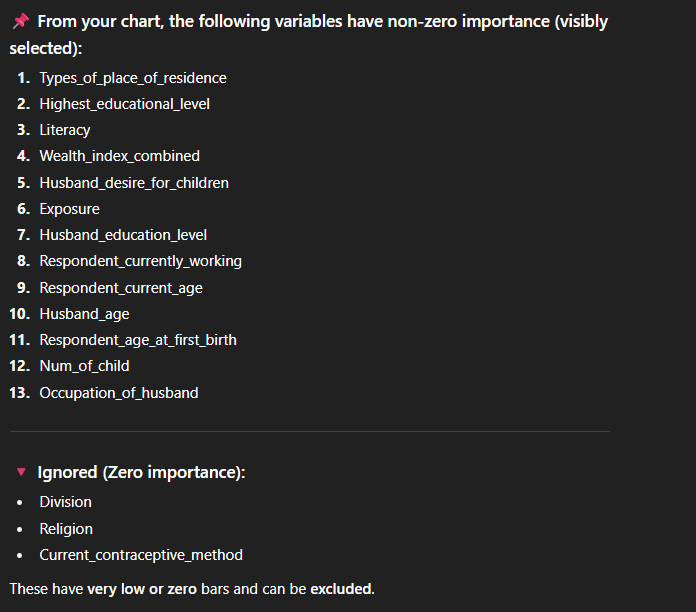

# Remove outliers

In [ ]:
df=df_2022

# Brouta

In [ ]:
df_2022.columns

Index(['Types_of_place_of_residence', 'Division', 'Highest_educational_level',
       'Religion', 'Literacy', 'Weath_index_combined',
       'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
       'Respondent_currently_working', 'Respondent_current_age', 'Husband_age',
       'Respondent age at first birth', 'num of child',
       'Occupation_of_husband', 'Current_contrceptive_method',
       'Age_at_first_marriage'],
      dtype='object')

In [ ]:
df_2022["Religion"]=df_2022["Religion"] .replace({4 : 3, 96:3})
df_2022.Religion.value_counts()

,count
Religion,
1,14356
2,1482
3,200


In [ ]:
df_2022["Husband_desire_for_children"]=df_2022["Husband_desire_for_children"] .replace({8 : 3})
df_2022.Husband_desire_for_children.value_counts()

,count
Husband_desire_for_children,
1,14057
2,1063
3,918


In [ ]:
df_boruta=df_2022.drop(columns='Age_at_first_marriage')

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)
boruta.fit(X.values, Y.values)

# Boruta decision (0/1)
boruta_selected = boruta.support_

# Continuous importance from RF
importance_scores = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.fit(X, Y).feature_importances_,
    'Selected': boruta_selected
})


/tmp/ipython-input-1144948988.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Importance_scaled'] = scaler.fit_transform(df_selected[['Importance']])
/tmp/ipython-input-1144948988.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_selected, x='Importance_scaled', y='Feature', palette='viridis')


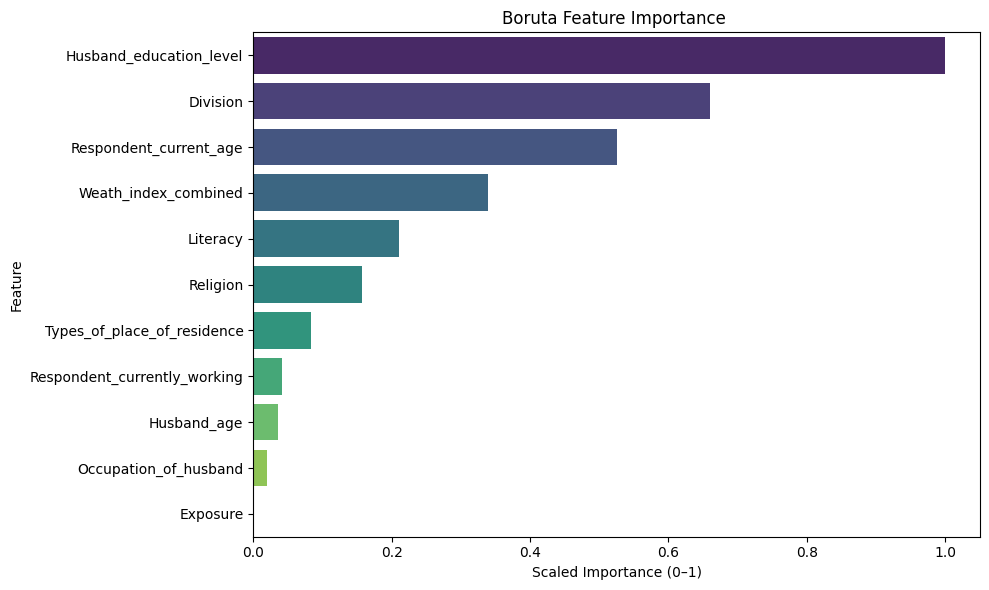

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Your feature importance DataFrame
df = pd.DataFrame({
    'Feature': [
        'Types_of_place_of_residence', 'Division', 'Highest_educational_level', 'Religion', 'Literacy',
        'Weath_index_combined', 'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
        'Respondent_currently_working', 'Respondent_current_age', 'Husband_age',
        'Respondent age at first birth', 'num of child', 'Occupation_of_husband',
        'Current_contrceptive_method'
    ],
    'Importance': [
        0.005751, 0.038172, 0.149109, 0.009870, 0.012889,
        0.020116, 0.001017, 0.001054, 0.057272,
        0.003410, 0.030631, 0.003043,
        0.663593, 0.000874, 0.002140,
        0.001058
    ],
    'Selected': [
        True, True, True, True, True,
        True, False, True, True,
        True, True, True,
        True, False, True,
        False
    ]
})

# Step 1: Remove outliers (IQR method)
Q1 = df['Importance'].quantile(0.25)
Q3 = df['Importance'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['Importance'] < (Q1 - 1.5 * IQR)) |
                      (df['Importance'] > (Q3 + 1.5 * IQR)))]

# Step 2: Keep only Boruta selected features
df_selected = df_no_outliers[df_no_outliers['Selected'] == True]

# Step 3: Scale importance (optional for better visualization)
scaler = MinMaxScaler()
df_selected['Importance_scaled'] = scaler.fit_transform(df_selected[['Importance']])

# Step 4: Sort by importance
df_selected = df_selected.sort_values(by='Importance_scaled', ascending=False)

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_selected, x='Importance_scaled', y='Feature', palette='viridis')

plt.xlabel('Scaled Importance (0–1)')
plt.ylabel('Feature')
plt.title('Boruta Feature Importance ')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3007123100.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_selected, x='Importance', y='Feature', palette='viridis')


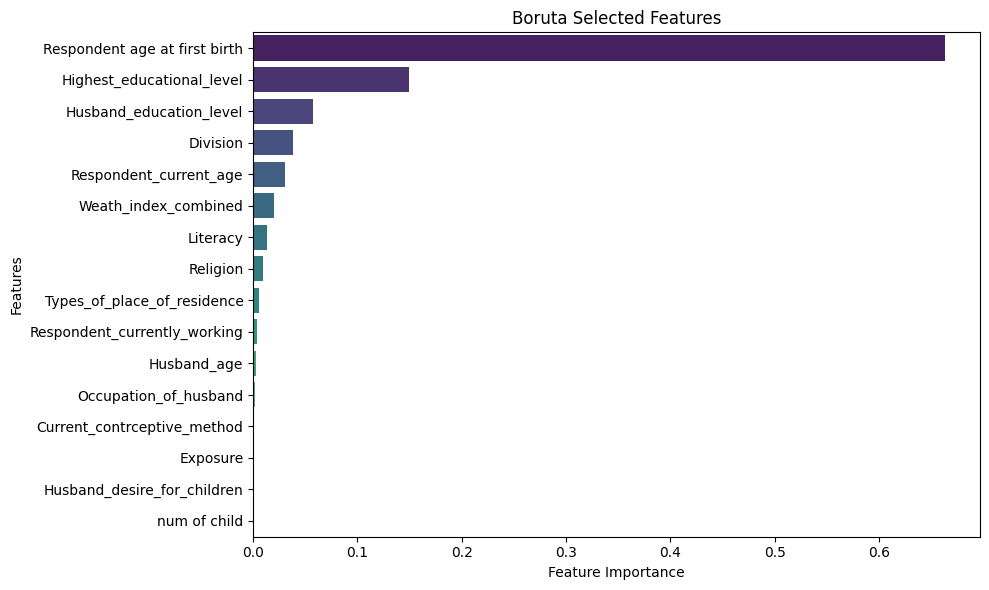

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Your feature importance DataFrame
df = pd.DataFrame({
    'Feature': [
        'Types_of_place_of_residence', 'Division', 'Highest_educational_level', 'Religion', 'Literacy',
        'Weath_index_combined', 'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
        'Respondent_currently_working', 'Respondent_current_age', 'Husband_age',
        'Respondent age at first birth', 'num of child', 'Occupation_of_husband',
        'Current_contrceptive_method'
    ],
    'Importance': [
        0.005751, 0.038172, 0.149109, 0.009870, 0.012889,
        0.020116, 0.001017, 0.001054, 0.057272,
        0.003410, 0.030631, 0.003043,
        0.663593, 0.000874, 0.002140,
        0.001058
    ],
    'Selected': [
        True, True, True, True, True,
        True, False, True, True,
        True, True, True,
        True, False, True,
        False
    ]
})


# Step 4: Sort by importance
df_selected = df.sort_values(by='Importance', ascending=False)

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_selected, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Boruta Selected Features')
plt.tight_layout()
plt.show()


# Extra

/tmp/ipython-input-239980308.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='features', y='Importance', data=df_melt, palette='RdYlGn')


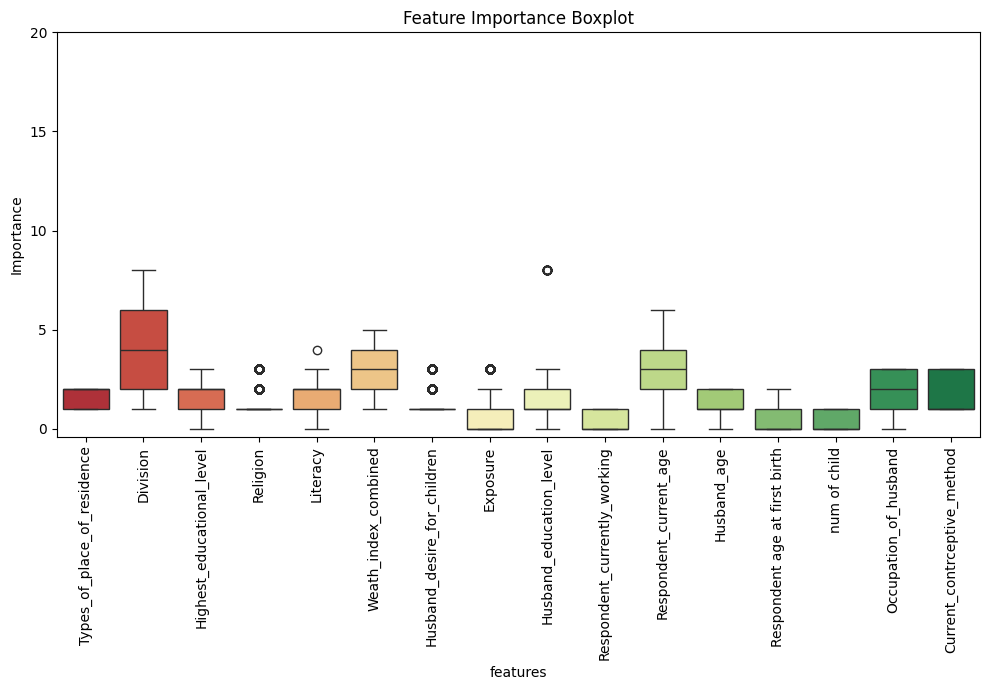

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example feature names (replace with your actual feature names)
# features = ['Types_of_place_of_residence', 'Division', 'Highest_educational_level', 'Literacy', 'Weath_index_combined',
#        'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
#        'Respondent_currently_working', 'Respondent_current_age', 'Husband_age',
#        'Respondent age at first birth', 'num of child',
#        'Occupation_of_husband', 'Current_contrceptive_method']


# Convert to DataFrame for plotting
df_melt = df_boruta.melt(var_name='features', value_name='Importance')


# Create the boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(x='features', y='Importance', data=df_melt, palette='RdYlGn')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 25, 5))
plt.title('Feature Importance Boxplot')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train a model
model = RandomForestClassifier()
model.fit(X, Y)

# Get importance scores
importance_scores = pd.DataFrame(model.feature_importances_,
                                 index=X.columns,
                                 columns=['Importance'])

print(importance_scores)

                               Importance
Types_of_place_of_residence      0.022133
Division                         0.091579
Highest_educational_level        0.085318
Religion                         0.018044
Literacy                         0.022797
Weath_index_combined             0.063180
Husband_desire_for_children      0.021909
Exposure                         0.027816
Husband_education_level          0.060535
Respondent_currently_working     0.018454
Respondent_current_age           0.081080
Husband_age                      0.037733
Respondent age at first birth    0.348701
num of child                     0.023766
Occupation_of_husband            0.042044
Current_contrceptive_method      0.034911
